# **Step 5: Data Visualization Lab**


In this step, I will be focusing on the visualization of data.

The data set is presented in the form of a RDBMS.

I will have to use SQL queries to extract the data.


## Objectives


In this lab I will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


I download database file.


In [83]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-08 18:03:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  33.6MB/s    in 1.0s    

2023-05-08 18:03:05 (33.6 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



I connect to the database.


In [84]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

I import pandas module.


In [85]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

## Demo: How to run an sql query


In [86]:
# I print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [87]:
# I print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [89]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [101]:
table_name = 'DatabaseWorkedWith'  # the table I wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


## Visualizing distribution of data


### Histograms


I Plot a histogram of `ConvertedComp.`


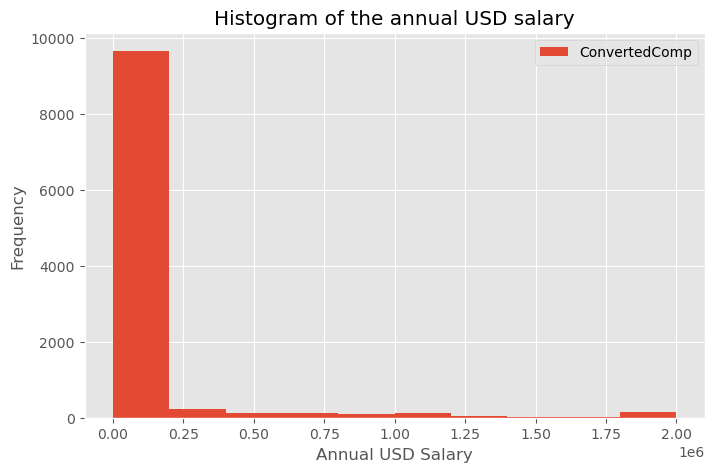

In [91]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.plot(kind = "hist", figsize = (8,5))

plt.title("Histogram of the annual USD salary")
plt.ylabel("Frequency")
plt.xlabel("Annual USD Salary")
plt.show()



### Box Plots


I plot a box plot of `Age.`


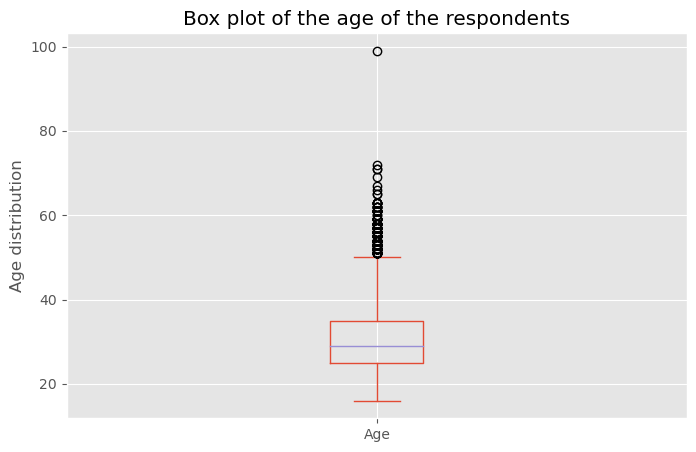

In [92]:
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.plot(kind = "box", figsize = (8,5))

plt.title("Box plot of the age of the respondents")
plt.ylabel("Age distribution")
plt.show()


## Visualizing relationships in data


### Scatter Plots


I create a scatter plot of `Age` and `WorkWeekHrs.`


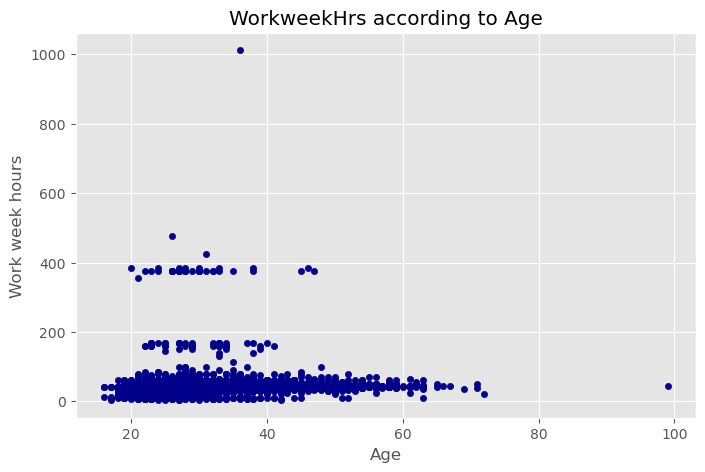

In [93]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.plot(kind = "scatter", x = "Age", y ="WorkWeekHrs", figsize = (8,5), color = 'darkblue')

plt.title("WorkweekHrs according to Age")
plt.ylabel("Work week hours")
plt.xlabel("Age")
plt.show()


### Bubble Plots


I create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


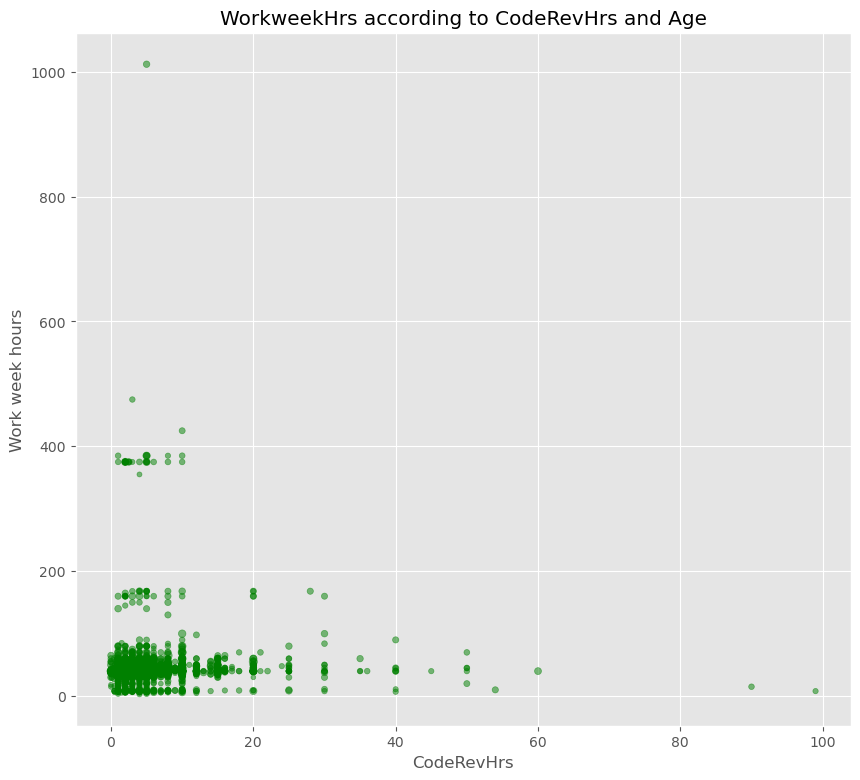

In [94]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
norm = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

df.plot(kind = "scatter",
        y = "WorkWeekHrs",
        x ="CodeRevHrs",
        figsize = (10,9),
        alpha  = 0.5,
        s = norm*50+10,
        color = 'green')

plt.title("WorkweekHrs according to CodeRevHrs and Age")
plt.xlabel("CodeRevHrs")
plt.ylabel("Work week hours")
plt.show()


## Visualizing composition of data


### Pie Charts


I create a pie chart of the top 5 databases that respondents wish to learn next year, label the pie chart with database names, display percentages of each database on the pie chart.


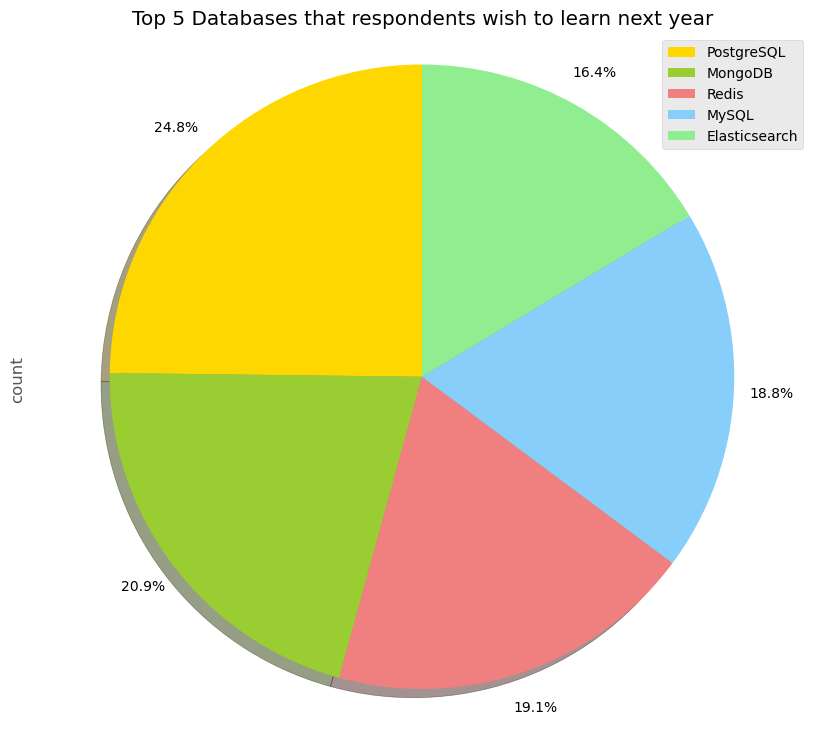

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


In [110]:
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as count
FROM DataBaseDesireNextYear
group by DatabaseDesireNextYear
order by count DESC
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df_top5 = df.head(5)
df_top5.set_index('DatabaseDesireNextYear',inplace=True)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
df_top5["count"].plot(kind = 'pie',
            figsize = (10,9),
            autopct='%1.1f%%', 
            startangle=90,    
            shadow=True,       
            labels=None,         # turn off labels on pie chart
            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
            colors=colors_list)

plt.title("Top 5 Databases that respondents wish to learn next year")
plt.axis('equal')
plt.legend(labels = df_top5.index)
plt.show()

QUERY = """
SELECT LanguageDesireNextYear, count(*) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count DESC
"""
df_l = pd.read_sql_query(QUERY,conn)
df_l.head()

QUERY = """
SELECT LanguageWorkedWith, count(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count DESC
"""
df_sql = pd.read_sql_query(QUERY,conn)
df_sql.head()

QUERY = """
SELECT DatabaseWorkedWith, count(*) as count
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
order by count DESC
"""
df_mysql = pd.read_sql_query(QUERY,conn)
df_mysql.head()

QUERY = """
SELECT DevType, count(*) as count
FROM DevType
group by DevType
order by count DESC
"""
df_devtype = pd.read_sql_query(QUERY,conn)
df_devtype.head()

### Stacked Charts


I create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


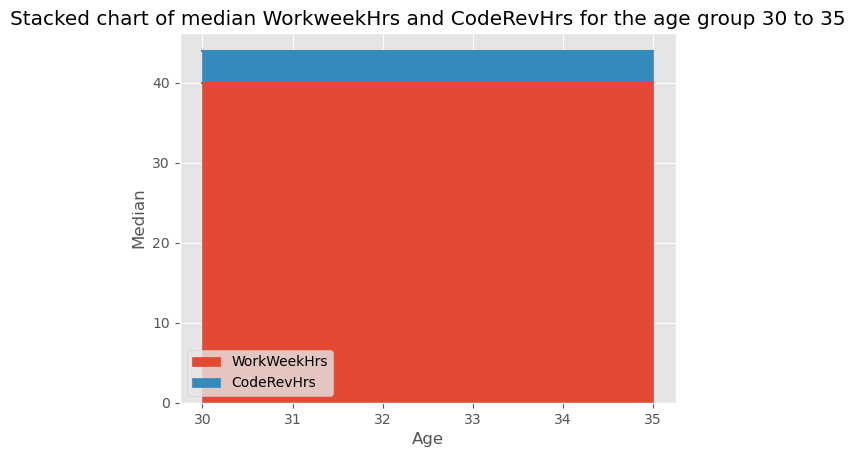

In [70]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <=35
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()

df.plot(kind = "area",
        stacked = True)

plt.title("Stacked chart of median WorkweekHrs and CodeRevHrs for the age group 30 to 35")
plt.ylabel("Median")
plt.show()



## Visualizing comparison of data


### Line Chart


I plot the median `ConvertedComp` for all ages from 45 to 60.


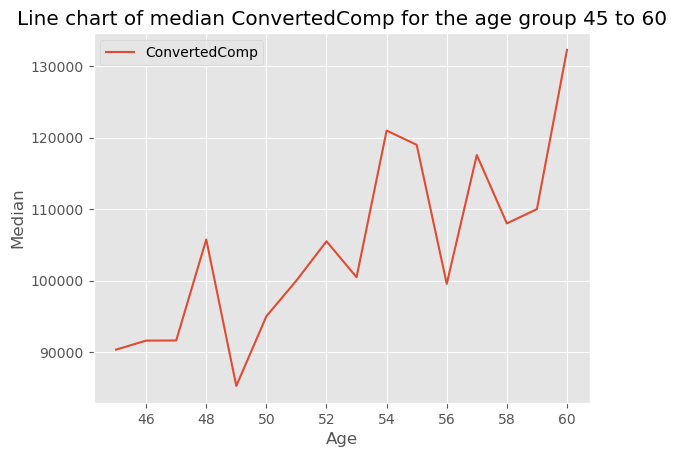

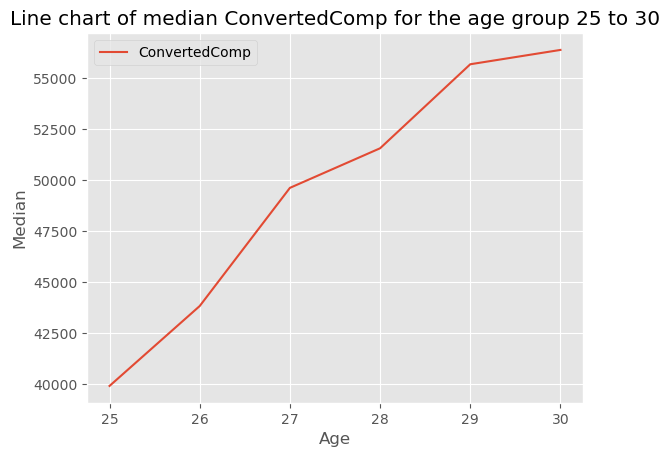

In [113]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <=60
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()

df.plot(kind = "line")

plt.title("Line chart of median ConvertedComp for the age group 45 to 60")
plt.ylabel("Median")
plt.show()

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 25 AND Age <=30
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df2 = pd.read_sql_query(QUERY,conn)
df2 = df2.groupby("Age").median()

df2.plot(kind = "line")

plt.title("Line chart of median ConvertedComp for the age group 25 to 30")
plt.ylabel("Median")
plt.show()


### Bar Chart


I create a horizontal bar chart using column `MainBranch.`


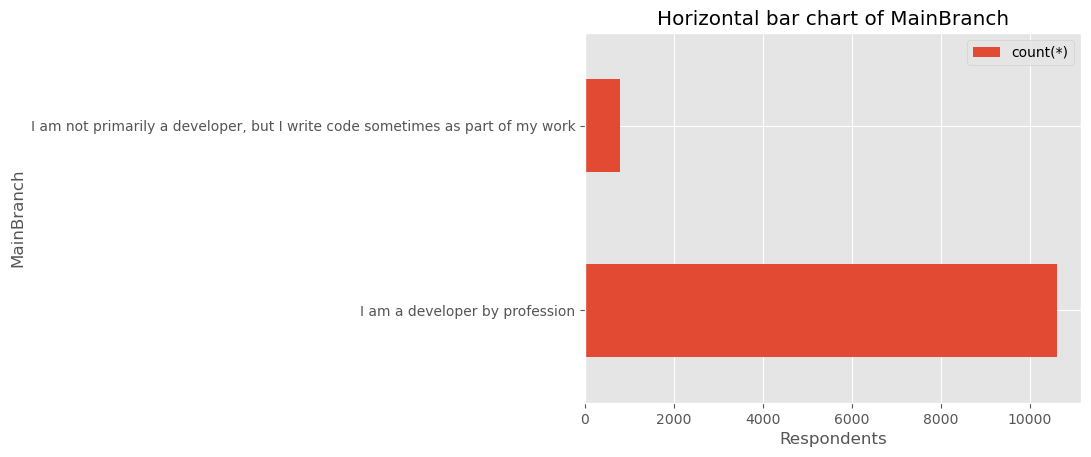

In [80]:
QUERY = """
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.set_index("MainBranch",inplace = True)
df.plot(kind = "barh")

plt.title("Horizontal bar chart of MainBranch")
plt.xlabel("Respondents")
plt.show()


I close the database connection.


In [81]:
conn.close()

## Next step: dashboards and final report
